# Importing Python libraries

In [27]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.preprocessing import MinMaxScaler   ## For scaling the data
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout   ## importing layers of Neural network
from keras.callbacks import ModelCheckpoint     ## imporing modelcheck pointer
from keras.losses import MSE                  ## importing error function
from keras.optimizers import Adam              ## importing optimizer
from keras.activations import relu           ## importing activation function



import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-block alert-success">  
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
<h1><center><strong> LI Stock</strong></center></h1>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
    <h6>"</h6>
        
</div>

# Loading dataset

In [28]:
data = pd.read_csv('LI_Stock.csv')

# -----------------------------------------------------------------------------------------------------------

<h1><center> Modelling LSTM</center></h1>

# -----------------------------------------------------------------------------------------------------------

# Selecting the Close price

In [29]:
df = data['Close'].values
print("Total No. of days of Stock :",df.shape[0])

Total No. of days of Stock : 251


### Splitting the data into train test split

In [30]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])
print('Training stock :',dataset_train.shape[0],'days')
print('Test stock :',dataset_test.shape[0],'days')

Training stock : 200 days
Test stock : 101 days


#### Scaling the data

a) Train Data

In [31]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train.reshape(-1, 1))


b) Test Data

In [32]:
dataset_test = scaler.transform(dataset_test.reshape(-1, 1))


### Function to prepare data for the LSTM

In [33]:
def create_dataset(df,n):
    x = []
    y = []
  
    for i in range(n, df.shape[0]):
        x.append(df[i-n:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y 

In [34]:
x_train, y_train = create_dataset(dataset_train,50)


In [35]:
x_test, y_test = create_dataset(dataset_test,50)


#### Reshape features for LSTM Layer

In [36]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [37]:
print('Training data shape',x_train.shape)
print('Test data shape',x_test.shape)


Training data shape (150, 50, 1)
Test data shape (51, 50, 1)


# Building LSTM Model

In [38]:
model = Sequential()

model.add(LSTM(units=96, 
               return_sequences=True,
               input_shape=(x_train.shape[1], 1)))

model.add(Dropout(0.2))

model.add(LSTM(units=96, 
               return_sequences=True))

model.add(Dropout(0.2))

model.add(LSTM(units=96, 
               return_sequences=True))

model.add(Dropout(0.2))

model.add(LSTM(units=96))

model.add(Dropout(0.2))

model.add(Dense(units=1))

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 50, 96)            37632     
_________________________________________________________________
dropout_4 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 50, 96)            74112     
_________________________________________________________________
dropout_5 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 50, 96)            74112     
_________________________________________________________________
dropout_6 (Dropout)          (None, 50, 96)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 96)               

In [40]:
model.compile(loss=MSE, optimizer=Adam())

In [41]:
checkpointer = ModelCheckpoint(filepath='nio.stock_prediction.hdf5',save_best_only=True,verbose=1)
callbacks = [checkpointer]

In [42]:
history = model.fit(x_train,y_train,batch_size=32,epochs=70,verbose=1,callbacks=[checkpointer],validation_split=0.05)

Epoch 1/70
5/5 [==============================] - ETA: 0s - loss: 0.1216
Epoch 00001: val_loss improved from inf to 0.05808, saving model to nio.stock_prediction.hdf5
5/5 [==============================] - 4s 835ms/step - loss: 0.1216 - val_loss: 0.0581
Epoch 2/70
5/5 [==============================] - ETA: 0s - loss: 0.0352
Epoch 00002: val_loss improved from 0.05808 to 0.02821, saving model to nio.stock_prediction.hdf5
5/5 [==============================] - 1s 141ms/step - loss: 0.0352 - val_loss: 0.0282
Epoch 3/70
5/5 [==============================] - ETA: 0s - loss: 0.0315
Epoch 00003: val_loss did not improve from 0.02821
5/5 [==============================] - 1s 133ms/step - loss: 0.0315 - val_loss: 0.0474
Epoch 4/70
5/5 [==============================] - ETA: 0s - loss: 0.0282
Epoch 00004: val_loss did not improve from 0.02821
5/5 [==============================] - 1s 130ms/step - loss: 0.0282 - val_loss: 0.0346
Epoch 5/70
5/5 [==============================] - ETA: 0s - loss: 

Epoch 38/70
5/5 [==============================] - ETA: 0s - loss: 0.0097
Epoch 00038: val_loss improved from 0.00171 to 0.00169, saving model to nio.stock_prediction.hdf5
5/5 [==============================] - 1s 173ms/step - loss: 0.0097 - val_loss: 0.0017
Epoch 39/70
5/5 [==============================] - ETA: 0s - loss: 0.0095
Epoch 00039: val_loss improved from 0.00169 to 0.00116, saving model to nio.stock_prediction.hdf5
5/5 [==============================] - 1s 156ms/step - loss: 0.0095 - val_loss: 0.0012
Epoch 40/70
5/5 [==============================] - ETA: 0s - loss: 0.0101
Epoch 00040: val_loss did not improve from 0.00116
5/5 [==============================] - 1s 142ms/step - loss: 0.0101 - val_loss: 0.0048
Epoch 41/70
5/5 [==============================] - ETA: 0s - loss: 0.0095
Epoch 00041: val_loss improved from 0.00116 to 0.00109, saving model to nio.stock_prediction.hdf5
5/5 [==============================] - 1s 149ms/step - loss: 0.0095 - val_loss: 0.0011
Epoch 42/70

### 5. Visualizing Results

#### Plotting the Predicted Stock Price with True Stock Price

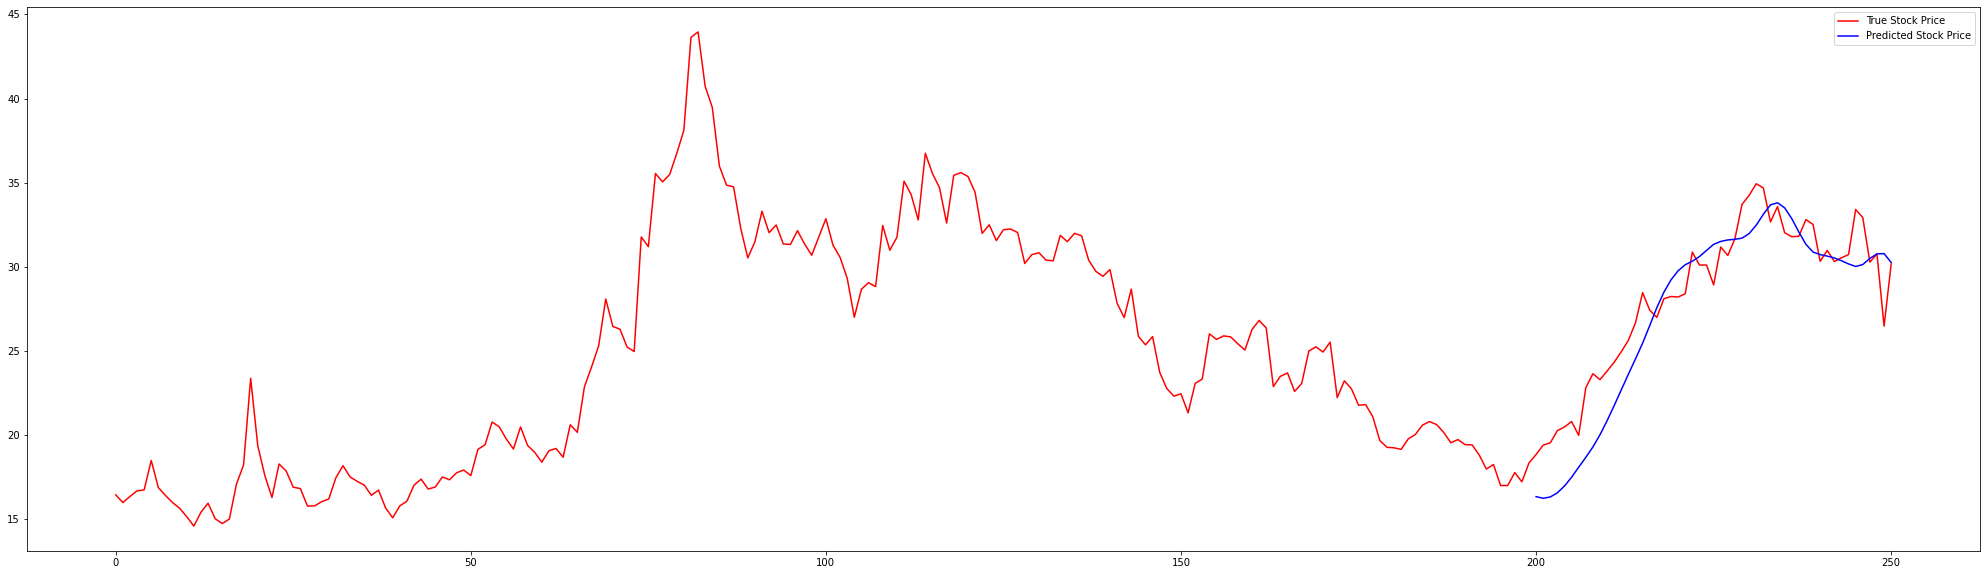

In [43]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

fig, ax = plt.subplots(figsize=(35,10))
plt.plot(df, color='red',  label="True Stock Price",)
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions, color='blue', label='Predicted Stock Price')
plt.legend()

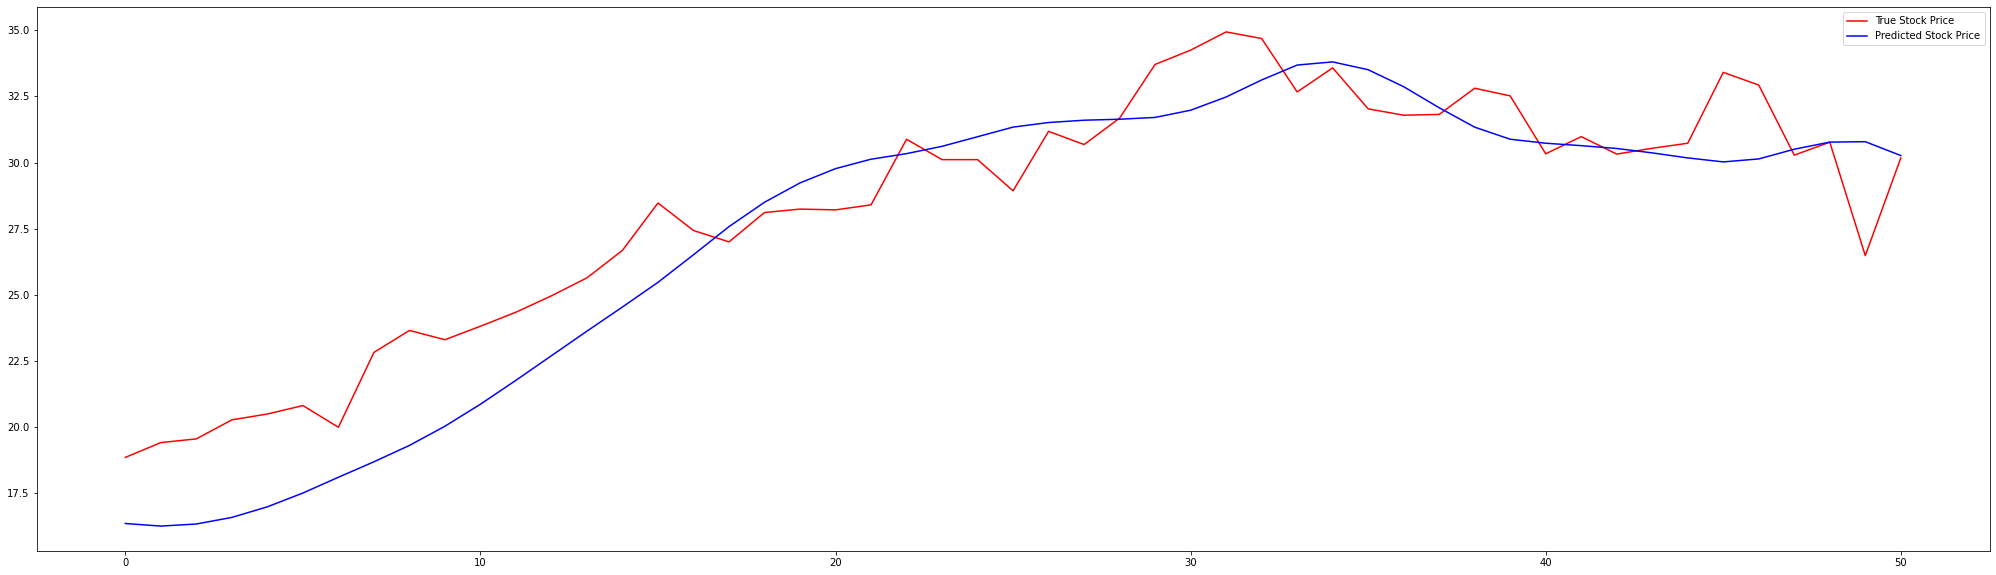

In [44]:
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))


fig, ax = plt.subplots(figsize=(35,10))
ax.plot(y_test_scaled, color='red', label='True Stock Price')
plt.plot(predictions, color='blue', label='Predicted Stock Price')
plt.legend()

The Graph looks beautiful !!

## Evaluation

In [45]:
data.reset_index(inplace=True)
comparison = data[['date','Close']].iloc[len(y_train)+50:] 
comparison['Predictions'] = predictions

### MSE

In [46]:
LR_test_mse=mean_squared_error(comparison['Close'],comparison['Predictions'])
print('Mean Squared Error: ', round(LR_test_mse,5))

Mean Squared Error:  4.57321


### MAE

In [47]:
LR_test_MAE=mean_absolute_error(comparison['Close'],comparison['Predictions'])
print('Mean Absolute Error: ', round(LR_test_MAE,5))

Mean Absolute Error:  1.71975
